In [25]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [27]:
csv_file = "sample_data.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
u = df['u']
g = df['g']
r = df['r']
i = df['i']
z = df['z']

# color indices
u_g = u - g
g_r = g - r
r_i = r - i
i_z = i - z

u_g = u_g[:-19500]
g_r = g_r[:-19500]
r_i = r_i[:-19500]
i_z = i_z[:-19500]

# Effective temperature of star
temperature = df['Teff']

color_filters_df = pd.DataFrame()
color_filters_df['u_g'] = u_g
color_filters_df['g_r'] = g_r
color_filters_df['r_i'] = r_i
color_filters_df['i_z'] = i_z

# Effective temperature of star
color_filters_df['temperature'] = df['Teff']

When your data fits well with a polynomial regression model of a very high degree, such as the 10th degree in your case, it suggests that there is a complex and possibly nonlinear relationship between your independent and dependent variables. In other words, a simple linear relationship (a straight line) is not sufficient to capture the patterns and variations in your data.

A high-degree polynomial regression can produce a curve that can flexibly fit your data points very closely. Each additional degree of freedom in the polynomial allows the model to adjust to the specific data points, resulting in a potentially better fit to the training data.

However, there are some important considerations to keep in mind:

    Overfitting: While a high-degree polynomial regression can fit the training data extremely well, it may not generalize well to unseen data (i.e., overfitting). The model may capture noise in the training data rather than the underlying true relationship, leading to poor performance on new, unseen data.

    Complexity: High-degree polynomial models can become very complex and difficult to interpret. They may not provide meaningful insights into the relationship between variables.

    Extrapolation: Extrapolating beyond the range of your training data with a high-degree polynomial can yield unreliable predictions because the model might produce extreme and unrealistic values.

To mitigate these issues, you can consider techniques like cross-validation to assess how well your high-degree polynomial model generalizes to new data, or you can explore alternative regression techniques that handle nonlinear relationships, such as spline regression, kernel regression, or decision tree-based models.

In summary, fitting your data well with a high-degree polynomial regression indicates a complex relationship in your data, but it also requires careful consideration of overfitting and the appropriateness of such a model for your specific application.

Printing g-r values


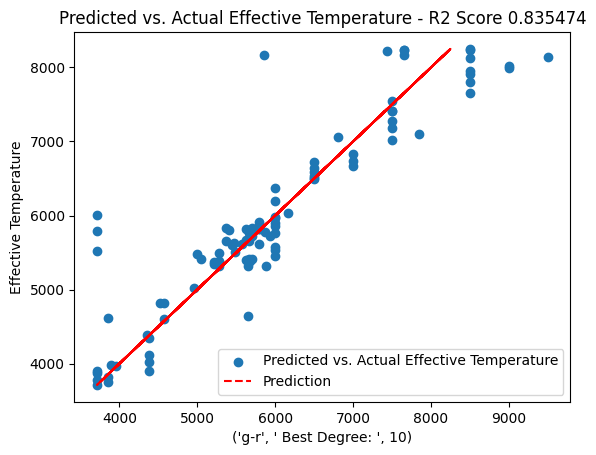

In [73]:
# string_list = [
#     "u_g",
#     "g_r",
#     "r_i",
#     "i_z",
#     "ug_gr",
#     "ug_ri",
#     "ug_iz",
#     "gr_ri",
#     "gr_iz",
#     "ri_iz",
#     "ug_gr_ri",
#     "ug_gr_iz",
#     "ug_ri_iz",
#     "gr_ri_iz",
#     "ug_gr_ri_iz"
# ]

x_train, x_test, y_train, y_test = train_test_split(color_filters_df["g_r"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_y = None
best_prediction = None
best_degree = 0

print("Printing g-r values")
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_y = y_test
        best_prediction = predictions
        best_degree = i

description = "g-r", " Best Degree: ", best_degree

plt.scatter(best_y, best_prediction, label="Predicted vs. Actual Effective Temperature")
plt.plot(best_prediction, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()

Printing g-r vs r-i values


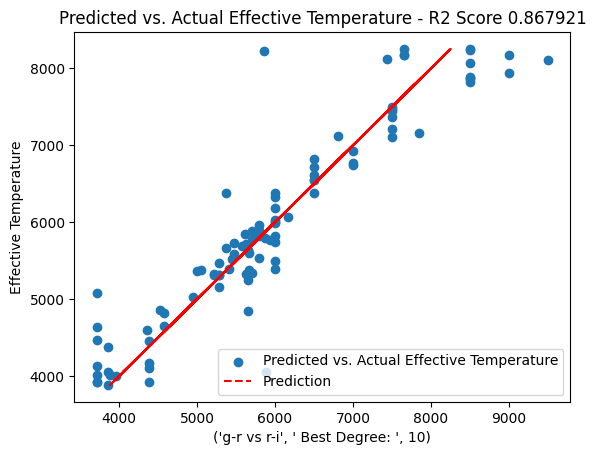

In [74]:
gr_ri = pd.DataFrame()
gr_ri = color_filters_df["g_r"] + color_filters_df["r_i"]

x_train, x_test, y_train, y_test = train_test_split(gr_ri, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_y = None
best_prediction = None
best_degree = 0

print("Printing g-r vs r-i values")
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_y = y_test
        best_prediction = predictions
        best_degree = i

description = "g-r vs r-i", " Best Degree: ", best_degree

plt.scatter(best_y, best_prediction, label="Predicted vs. Actual Effective Temperature")
plt.plot(best_prediction, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()

Printing u-g vs g-r vs r-i values


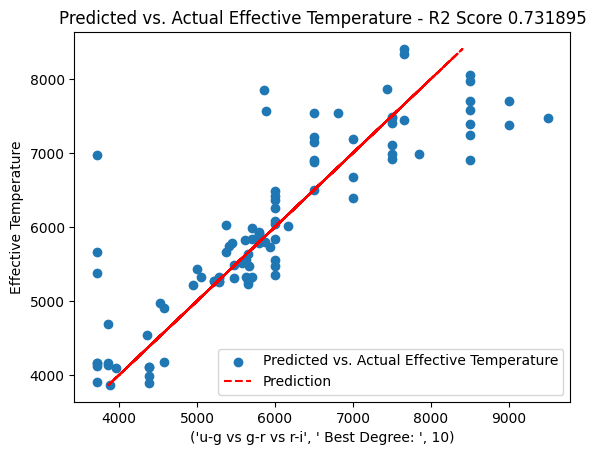

In [78]:
ug_gr_ri = pd.DataFrame()
ug_gr_ri = color_filters_df["u_g"] + color_filters_df["g_r"] + color_filters_df["r_i"]

x_train, x_test, y_train, y_test = train_test_split(ug_gr_ri, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_y = None
best_prediction = None
best_degree = 0

print("Printing u-g vs g-r vs r-i values")
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_y = y_test
        best_prediction = predictions
        best_degree = i

description = "u-g vs g-r vs r-i", " Best Degree: ", best_degree

plt.scatter(best_y, best_prediction, label="Predicted vs. Actual Effective Temperature")
plt.plot(best_prediction, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()

Printing u-g vs g-r vs r-i values


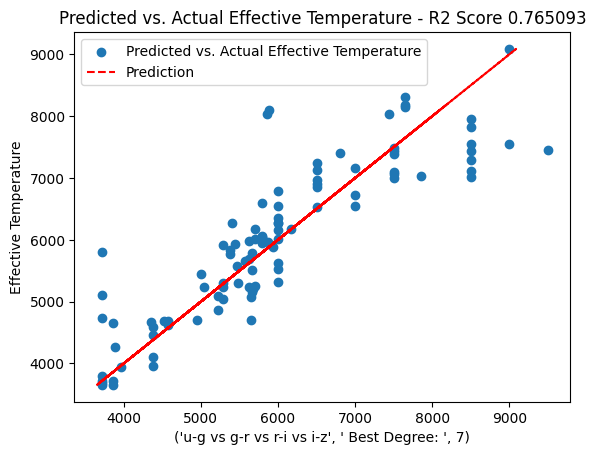

In [79]:
ug_gr_ri_iz = pd.DataFrame()
ug_gr_ri_iz = color_filters_df["u_g"] + color_filters_df["g_r"] + color_filters_df["r_i"] + color_filters_df["i_z"]

x_train, x_test, y_train, y_test = train_test_split(ug_gr_ri_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_y = None
best_prediction = None
best_degree = 0

print("Printing u-g vs g-r vs r-i values")
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_y = y_test
        best_prediction = predictions
        best_degree = i

description = "u-g vs g-r vs r-i vs i-z", " Best Degree: ", best_degree

plt.scatter(best_y, best_prediction, label="Predicted vs. Actual Effective Temperature")
plt.plot(best_prediction, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()